In [1]:
import pandas as pd
import numpy as np
# load the dataset

dataset1 = pd.read_csv('./lq_gsm/X_data_LIVE_Qualcomm_GSM.csv', header=None)
datay1 = pd.read_csv('./lq_gsm/y_data_LIVE_Qualcomm_GSM.csv', header=None)


print("size ",dataset1.shape)
#X1 = dataset1.iloc[:,0:1025]
#X1 = dataset1.sample(n=10) #np.array(dataset1)
#print(dataset1.sample(n=10))
X1 = np.array(dataset1)
y1= np.array(datay1)
print(X1.shape)
print(type(datay1),datay1.shape)


size  (208, 1024)
(208, 1024)
<class 'pandas.core.frame.DataFrame'> (208, 1)


In [2]:
X1_lq_a = X1[0:36,:] # Artifacts
X1_lq_c = X1[36:71, :] # Color
X1_lq_e = X1[71:105, :] # Exposure
X1_lq_f = X1[105:139, :] # Focus
X1_lq_sh = X1[139:173, :] # Sharpness
X1_lq_sb = X1[173:208, :] # Stabilization

y1_lq_a = y1[0:36, :].astype(int) # Artifacts
y1_lq_c = y1[36:71, :].astype(int) # Color
y1_lq_e = y1[71:105, :].astype(int) # Exposure
y1_lq_f = y1[105:139, :].astype(int) # Focus
y1_lq_sh = y1[139:173, :].astype(int) # Sharpness
y1_lq_sb = y1[173:208, :].astype(int) # Stabilization

In [153]:
np.argmin(np.abs(np.median(y1_lq_a)-y1_lq_a)), y1_lq_a[13]

(13, array([50]))

In [98]:
aa = X1_lq_a[y1_lq_a.argmax()].reshape(1,-1)
print(aa.shape,aa)

(1, 1024) [[0.13967732 0.73738009 0.22205184 ... 0.02619159 0.00622616 0.00471591]]


In [3]:
## Artifacts
x11_lq_a = X1_lq_a[y1_lq_a.argmax()].reshape(1,-1)
x12_lq_a = X1_lq_a[y1_lq_a.argmin()].reshape(1,-1)
x13_lq_a = X1_lq_a[np.argmin(np.abs(np.median(y1_lq_a) - y1_lq_a))].reshape(1,-1)
## Color
x11_lq_c = X1_lq_c[y1_lq_c.argmax()].reshape(1,-1)
x12_lq_c = X1_lq_c[y1_lq_c.argmin()].reshape(1,-1)
x13_lq_c = X1_lq_c[np.argmin(np.abs(np.median(y1_lq_c) - y1_lq_c))].reshape(1,-1)
## Artifacts
x11_lq_e = X1_lq_e[y1_lq_e.argmax()].reshape(1,-1)
x12_lq_e = X1_lq_e[y1_lq_e.argmin()].reshape(1,-1)
x13_lq_e = X1_lq_e[np.argmin(np.abs(np.median(y1_lq_e) - y1_lq_e))].reshape(1,-1)
## Artifacts
x11_lq_f = X1_lq_f[y1_lq_f.argmax()].reshape(1,-1)
x12_lq_f = X1_lq_f[y1_lq_f.argmin()].reshape(1,-1)
x13_lq_f = X1_lq_f[np.argmin(np.abs(np.median(y1_lq_f) - y1_lq_f))].reshape(1,-1)
## Artifacts
x11_lq_sh = X1_lq_sh[y1_lq_sh.argmax()].reshape(1,-1)
x12_lq_sh = X1_lq_sh[y1_lq_sh.argmin()].reshape(1,-1)
x13_lq_sh = X1_lq_sh[np.argmin(np.abs(np.median(y1_lq_sh) - y1_lq_sh))].reshape(1,-1)
## Artifacts
x11_lq_sb = X1_lq_sb[y1_lq_sb.argmax()].reshape(1,-1)
x12_lq_sb = X1_lq_sb[y1_lq_sb.argmin()].reshape(1,-1)
x13_lq_sb = X1_lq_sb[np.argmin(np.abs(np.median(y1_lq_sb) - y1_lq_sb))].reshape(1,-1)

In [4]:
dataX1 = np.concatenate((x11_lq_a,x12_lq_a,x13_lq_a, x11_lq_c,x12_lq_c,x13_lq_c,x11_lq_e,x12_lq_e,x13_lq_e,
                        x11_lq_f,x12_lq_f,x13_lq_f,x11_lq_sh,x12_lq_sh,x13_lq_sh, x11_lq_sb,x12_lq_sb,x13_lq_sb), 
                        axis=0)

In [5]:
dataX1.shape

(18, 1024)

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
ts1 = TSNE(n_components=2).fit_transform(dataX1)
print(type(ts1), ts1.shape)

<class 'numpy.ndarray'> (18, 2)


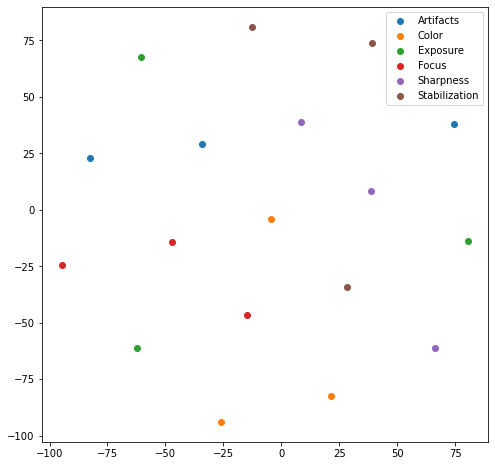

In [7]:

A1 = ts1[0:3, :] # Artifacts
B1 = ts1[3:6, :] # Color
C1 = ts1[6:9, :] # Exposure
D1 = ts1[9:12, :] # Focus
E1 = ts1[12:15, :] # Sharpness
F1 = ts1[15:18, :] # Stabilization

# show plot
plt.show()
plt.figure(figsize=(8,8))
plt.scatter(A1[:, 0], A1[:, 1], label = 'Artifacts' )
plt.scatter(B1[:, 0], B1[:, 1], label = 'Color' )
plt.scatter(C1[:, 0], C1[:, 1], label = 'Exposure' )
plt.scatter(D1[:, 0], D1[:, 1], label = 'Focus' )
plt.scatter(E1[:, 0], E1[:, 1], label = 'Sharpness' )
plt.scatter(F1[:, 0], F1[:, 1], label = 'Stabilization' )
plt.legend()
plt.savefig('LQ_GSM.jpg')

## GSM + NIQE

In [8]:
import pandas as pd
import numpy as np
# load the dataset

dataset2 = pd.read_csv('./lq_gsm_nq/X_data_LIVE_Qualcomm_GSM_NIQE.csv', header=None)


print("size ",dataset2.shape)
#X = dataset1.iloc[:,0:1025]
X2 = np.array(dataset2)

print(X2.shape)

size  (208, 1025)
(208, 1025)


In [9]:
X2_lq_a = X2[0:36,:] # Artifacts
X2_lq_c = X2[36:71, :] # Color
X2_lq_e = X2[71:105, :] # Exposure
X2_lq_f = X2[105:139, :] # Focus
X2_lq_sh = X2[139:173, :] # Sharpness
X2_lq_sb = X2[173:208, :] # Stabilization

y1_lq_a = y1[0:36, :] # Artifacts
y1_lq_c = y1[36:71, :] # Color
y1_lq_e = y1[71:105, :] # Exposure
y1_lq_f = y1[105:139, :] # Focus
y1_lq_sh = y1[139:173, :] # Sharpness
y1_lq_sb = y1[173:208, :] # Stabilization

In [10]:
## Artifacts
x21_lq_a = X2_lq_a[y1_lq_a.argmax()].reshape(1,-1)
x22_lq_a = X2_lq_a[y1_lq_a.argmin()].reshape(1,-1)
x23_lq_a = X2_lq_a[np.argmin(np.abs(np.median(y1_lq_a) - y1_lq_a))].reshape(1,-1)
## Color
x21_lq_c = X2_lq_c[y1_lq_c.argmax()].reshape(1,-1)
x22_lq_c = X2_lq_c[y1_lq_c.argmin()].reshape(1,-1)
x23_lq_c = X2_lq_c[np.argmin(np.abs(np.median(y1_lq_c) - y1_lq_c))].reshape(1,-1)
## Artifacts
x21_lq_e = X2_lq_e[y1_lq_e.argmax()].reshape(1,-1)
x22_lq_e = X2_lq_e[y1_lq_e.argmin()].reshape(1,-1)
x23_lq_e = X2_lq_e[np.argmin(np.abs(np.median(y1_lq_e) - y1_lq_e))].reshape(1,-1)
## Artifacts
x21_lq_f = X2_lq_f[y1_lq_f.argmax()].reshape(1,-1)
x22_lq_f = X2_lq_f[y1_lq_f.argmin()].reshape(1,-1)
x23_lq_f = X2_lq_f[np.argmin(np.abs(np.median(y1_lq_f) - y1_lq_f))].reshape(1,-1)
## Artifacts
x21_lq_sh = X2_lq_sh[y1_lq_sh.argmax()].reshape(1,-1)
x22_lq_sh = X2_lq_sh[y1_lq_sh.argmin()].reshape(1,-1)
x23_lq_sh = X2_lq_sh[np.argmin(np.abs(np.median(y1_lq_sh) - y1_lq_sh))].reshape(1,-1)
## Artifacts
x21_lq_sb = X2_lq_sb[y1_lq_sb.argmax()].reshape(1,-1)
x22_lq_sb = X2_lq_sb[y1_lq_sb.argmin()].reshape(1,-1)
x23_lq_sb = X2_lq_sb[np.argmin(np.abs(np.median(y1_lq_sb) - y1_lq_sb))].reshape(1,-1)

In [11]:
dataX2 = np.concatenate((x21_lq_a,x22_lq_a,x23_lq_a, x21_lq_c,x22_lq_c,x23_lq_c,x21_lq_e,x22_lq_e,x23_lq_e,
                        x21_lq_f,x22_lq_f,x23_lq_f,x21_lq_sh,x22_lq_sh,x23_lq_sh, x21_lq_sb,x22_lq_sb,x23_lq_sb), 
                        axis=0)

In [12]:
dataX2.shape

(18, 1025)

(18, 2)


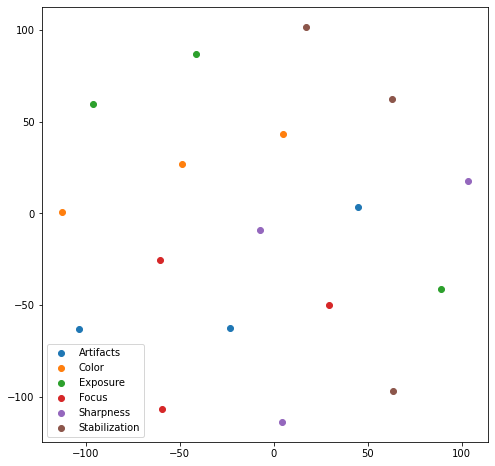

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
ts2 = TSNE(n_components=2).fit_transform(dataX2)
print(ts2.shape)
A2 = ts2[0:3, :] # Artifacts
B2 = ts2[3:6, :] # Color
C2 = ts2[6:9, :] # Exposure
D2 = ts2[9:12, :] # Focus
E2 = ts2[12:15, :] # Sharpness
F2 = ts2[15:18, :] # Stabilization

# show plot
plt.show()
plt.figure(figsize=(8,8))
plt.scatter(A2[:, 0], A2[:, 1], label = 'Artifacts' )
plt.scatter(B2[:, 0], B2[:, 1], label = 'Color' )
plt.scatter(C2[:, 0], C2[:, 1], label = 'Exposure' )
plt.scatter(D2[:, 0], D2[:, 1], label = 'Focus' )
plt.scatter(E2[:, 0], E2[:, 1], label = 'Sharpness' )
plt.scatter(F2[:, 0], F2[:, 1], label = 'Stabilization')
plt.legend()
plt.savefig('LQ_GSM_NQ.jpg')

# SEG16GSM

In [14]:
import pandas as pd
import numpy as np
# load the dataset

dataset3 = pd.read_csv('./lq_seg16gsm/X_data_LIVE_Qualcomm_seg16GSM.csv', header=None)
datasety3 = pd.read_csv('./lq_seg16gsm/y_data_LIVE_Qualcomm_seg16GSM.csv', header=None)

print("size ",dataset3.shape)
#X = dataset1.iloc[:,0:1025]
X3 = np.array(dataset3)
y3 = np.array(datasety3)
print(X3.shape, y3.shape)


size  (3328, 1024)
(3328, 1024) (3328, 1)


In [15]:
X3_lq_a = X3[0:576, :] # Artifacts
X3_lq_c = X3[576:1136, :] # Color
X3_lq_e = X3[1136:1680, :] # Exposure
X3_lq_f = X3[1680:2224, :] # Focus
X3_lq_sh = X3[2224:2768, :] # Sharpness
X3_lq_sb = X3[2768:3328, :] # Stabilization

y3_lq_a = y3[0:576, :] # Artifacts
y3_lq_c = y3[576:1136, :] # Color
y3_lq_e = y3[1136:1680, :] # Exposure
y3_lq_f = y3[1680:2224, :] # Focus
y3_lq_sh = y3[2224:2768, :] # Sharpness
y3_lq_sb = y3[2768:3328, :] # Stabilization

In [141]:
a = [10,29,50,60,20]
x = np.argmin(np.abs(np.median(a) - a))
print("median index ",x, "value ",a[x], np.median(a))
print(y1[13])

median index  1 value  29 29.0
[50.3784972]


In [16]:
max1 = int(np.max(y1_lq_a))
min1 = int(np.min(y1_lq_a))
median1 = int(y3[np.argmin(np.abs(np.median(y1_lq_a) - y1_lq_a))])
print(int(max1),int(min1),int(median1))
artifacts_idx = []
for idx, value in enumerate(y3_lq_a):
    val = int(value)
    #print(val)
    if val == max1:
        #print(val, max1)
        artifacts_idx.append(idx)
    elif val == min1:
        artifacts_idx.append(idx)
    elif val == median1:
        artifacts_idx.append(idx)

### Color
max2 = int(np.max(y1_lq_c))
min2 = int(np.min(y1_lq_c))
median2 = int(y3[np.argmin(np.abs(np.median(y1_lq_c) - y1_lq_c))])
#print(int(max1),int(min1),int(median1))
color_idx = []
for idx, value in enumerate(y3_lq_c):
    val = int(value)
    #print(val)
    if val == max2:
        #print(val, max1)
        color_idx.append(idx)
    elif val == min2:
        color_idx.append(idx)
    elif val == median2:
        color_idx.append(idx)

##Exposure
max3 = int(np.max(y1_lq_e))
min3 = int(np.min(y1_lq_e))
median3 = int(y3[np.argmin(np.abs(np.median(y1_lq_e) - y1_lq_e))])
#print(int(max1),int(min1),int(median1))
exposure_idx = []
for idx, value in enumerate(y3_lq_e):
    val = int(value)
    #print(val)
    if val == max3:
        #print(val, max1)
        exposure_idx.append(idx)
    elif val == min3:
        exposure_idx.append(idx)
    elif val == median3:
        exposure_idx.append(idx)

### Focus
max4 = int(np.max(y1_lq_f))
min4 = int(np.min(y1_lq_f))
median4 = int(y3[np.argmin(np.abs(np.median(y1_lq_f) - y1_lq_f))])
print(int(max1),int(min1),int(median1))
focus_idx = []
for idx, value in enumerate(y3_lq_f):
    val = int(value)
    #print(val)
    if val == max4:
        #print(val, max1)
        focus_idx.append(idx)
    elif val == min4:
        focus_idx.append(idx)
    elif val == median4:
        focus_idx.append(idx)

### Sharpness
max5 = int(np.max(y1_lq_sh))
min5 = int(np.min(y1_lq_sh))
median5 = int(y3[np.argmin(np.abs(np.median(y1_lq_sh) - y1_lq_sh))])
#print(int(max1),int(min1),int(median1))
sharpness_idx = []
for idx, value in enumerate(y3_lq_sh):
    val = int(value)
    #print(val)
    if val == max5:
        #print(val, max1)
        sharpness_idx.append(idx)
    elif val == min5:
        sharpness_idx.append(idx)
    elif val == median5:
        sharpness_idx.append(idx)

## stabilization
max6 = int(np.max(y1_lq_sb))
min6 = int(np.min(y1_lq_sb))
median6 = int(y3[np.argmin(np.abs(np.median(y1_lq_sb) - y1_lq_sb))])
#print(int(max1),int(min1),int(median1))
stabilization_idx = []
for idx, value in enumerate(y3_lq_sb):
    val = int(value)
    #print(val)
    if val == max1:
        #print(val, max1)
        stabilization_idx.append(idx)
    elif val == min1:
        stabilization_idx.append(idx)
    elif val == median1:
        stabilization_idx.append(idx)

69 21 52
69 21 52


In [17]:
print(len(artifacts_idx),len(color_idx),len(exposure_idx),len(focus_idx),len(sharpness_idx),len(stabilization_idx))

96 64 48 32 48 32


In [166]:
a = [1,2,5]
vv = np.array([10,20,30,40,50,60])
print(vv[a])

[20 30 60]


In [18]:
x31_lq_a = X3_lq_a[artifacts_idx]
x31_lq_c = X3_lq_c[color_idx]
x31_lq_e = X3_lq_e[exposure_idx]
x31_lq_f = X3_lq_f[focus_idx]
x31_lq_sh = X3_lq_sh[sharpness_idx]
x31_lq_sb = X3_lq_sb[stabilization_idx]

dataX3 = np.concatenate((x31_lq_a,x31_lq_c,x31_lq_e,x31_lq_f,x31_lq_sh,x31_lq_sb),axis=0)
dataX3.shape

(320, 1024)

In [19]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
ts3 = TSNE(n_components=2).fit_transform(dataX3)
print(ts3.shape)

(320, 2)


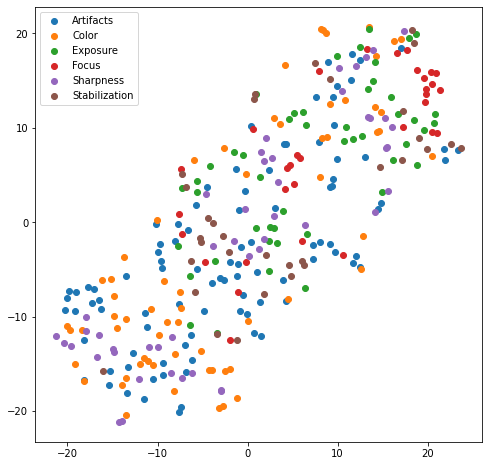

In [20]:

A3 = ts3[0:96, :] # Artifacts
B3 = ts3[96:160, :] # Color
C3 = ts3[160:208, :] # Exposure
D3 = ts3[208:240, :] # Focus
E3 = ts3[240:288, :] # Sharpness
F3 = ts3[288:320, :] # Stabilization

# show plot
plt.show()
plt.figure(figsize=(8,8))
plt.scatter(A3[:, 0], A3[:, 1], label = 'Artifacts' )
plt.scatter(B3[:, 0], B3[:, 1], label = 'Color' )
plt.scatter(C3[:, 0], C3[:, 1], label = 'Exposure' )
plt.scatter(D3[:, 0], D3[:, 1], label = 'Focus' )
plt.scatter(E3[:, 0], E3[:, 1], label = 'Sharpness' )
plt.scatter(F3[:, 0], F3[:, 1],label = 'Stabilization')
plt.legend()
plt.savefig('LQ_seg16GSM.jpg')

# SEG16GSM_NIQE

In [21]:
import pandas as pd
import numpy as np
# load the dataset

dataset4 = pd.read_csv('./lq_seg16gsm_nq/X_data_LIVE_Qualcomm_seg16GSM_NIQE.csv', header=None)

dataset4.to_numpy()
print("size ",dataset4.shape)
#X = dataset1.iloc[:,0:1025]
X4 = np.array(dataset4)

print(X4.shape)

size  (3328, 1025)
(3328, 1025)


In [22]:
X4_lq_a = X4[0:576, :] # Artifacts
X4_lq_c = X4[576:1136, :] # Color
X4_lq_e = X4[1136:1680, :] # Exposure
X4_lq_f = X4[1680:2224, :] # Focus
X4_lq_sh = X4[2224:2768, :] # Sharpness
X4_lq_sb = X4[2768:3328, :] # Stabilization

y4_lq_a = y3[0:576, :] # Artifacts
y4_lq_c = y3[576:1136, :] # Color
y4_lq_e = y3[1136:1680, :] # Exposure
y4_lq_f = y3[1680:2224, :] # Focus
y4_lq_sh = y3[2224:2768, :] # Sharpness
y4_lq_sb = y3[2768:3328, :] # Stabilization

In [23]:
x41_lq_a = X4_lq_a[artifacts_idx]
x41_lq_c = X4_lq_c[color_idx]
x41_lq_e = X4_lq_e[exposure_idx]
x41_lq_f = X4_lq_f[focus_idx]
x41_lq_sh = X4_lq_sh[sharpness_idx]
x41_lq_sb = X4_lq_sb[stabilization_idx]

dataX4 = np.concatenate((x41_lq_a,x41_lq_c,x41_lq_e,x41_lq_f,x41_lq_sh,x41_lq_sb),axis=0)
dataX4.shape

(320, 1025)

In [24]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
ts4 = TSNE(n_components=2).fit_transform(dataX4)
print(ts4.shape)

(320, 2)


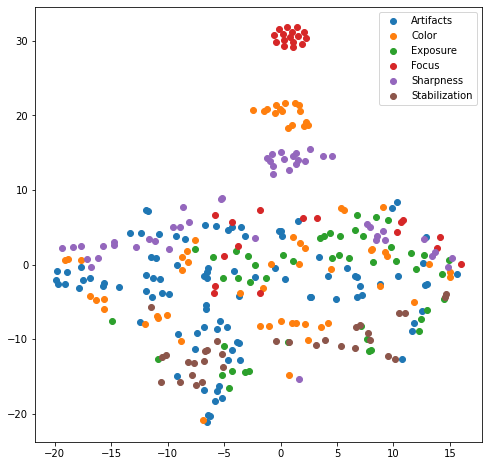

In [25]:

A4 = ts4[0:96, :] # Artifacts
B4 = ts4[96:160, :] # Color
C4 = ts4[160:208, :] # Exposure
D4 = ts4[208:240, :] # Focus
E4 = ts4[240:288, :] # Sharpness
F4 = ts4[288:320, :] # Stabilization

# show plot
plt.show()
plt.figure(figsize=(8,8))
plt.scatter(A4[:, 0], A4[:, 1], label = 'Artifacts' )
plt.scatter(B4[:, 0], B4[:, 1], label = 'Color' )
plt.scatter(C4[:, 0], C4[:, 1], label = 'Exposure' )
plt.scatter(D4[:, 0], D4[:, 1], label = 'Focus' )
plt.scatter(E4[:, 0], E4[:, 1], label = 'Sharpness' )
plt.scatter(F4[:, 0], F4[:, 1],label = 'Stabilization')
plt.legend()
plt.savefig('LQ_seg16GSM_NIQE.jpg')